In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as data
print("All library imported sucessfully")

All library imported sucessfully


In [4]:
from pandas_datareader import data as data
yf.pdr_override()
print("imported data elemnt as data from panda_datareader")

imported data elemnt as data from panda_datareader


In [5]:
start='2012-01-01'
end='2022-12-31'
k='AAPL'

df= data.DataReader(k,start,end)
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482927,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550013,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689341,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821990,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801658,394024400


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.233658,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.552719,77034200


In [7]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482927,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550013,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689341,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821990,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801658,394024400


In [8]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


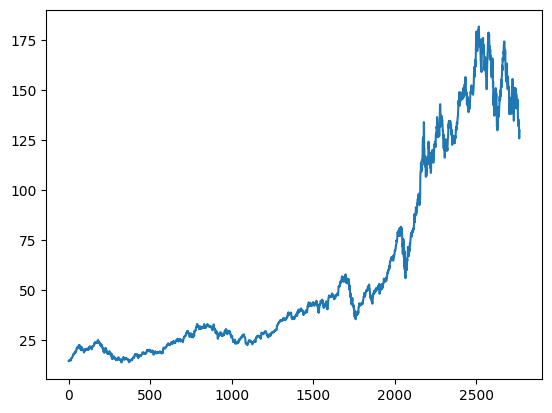

In [9]:
plt.plot(df.Close)

In [10]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
2763,130.919998,132.419998,129.639999,131.860001,63814900
2764,131.380005,131.410004,128.720001,130.029999,69007800
2765,129.669998,131.029999,125.870003,126.040001,85438400
2766,127.989998,130.479996,127.730003,129.610001,75703700


ma100=df.Close.rolling(100).mean()
ma100

In [11]:
ma100=df.Close.rolling(100).mean()
ma100


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    150.515600
2764    150.157800
2765    149.764699
2766    149.412100
2767    149.062199
Name: Close, Length: 2768, dtype: float64

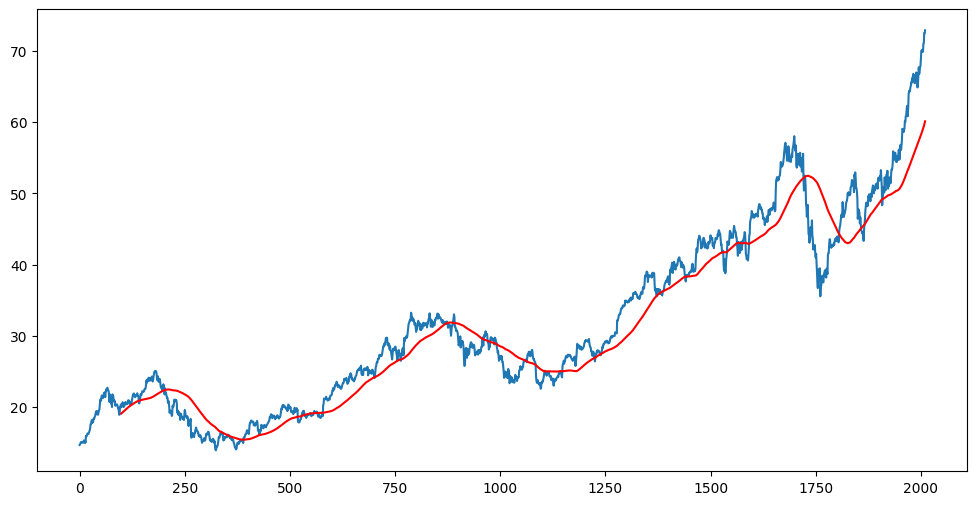

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [12]:
ma200=df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2763    152.1331
2764    152.0096
2765    151.8867
2766    151.7593
2767    151.6110
Name: Close, Length: 2768, dtype: float64

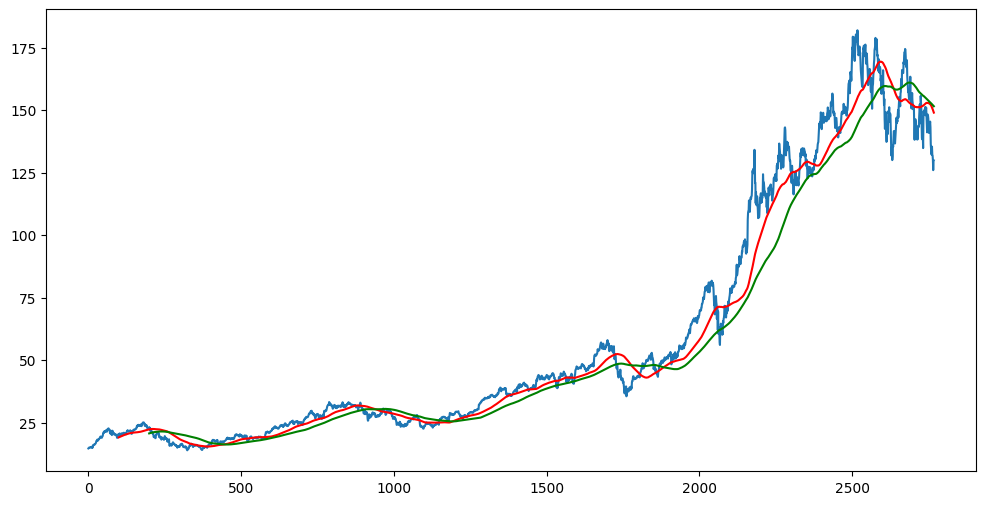

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [12]:
df.shape

(2768, 5)

In [14]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [15]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [16]:
data_testing.head()

,Close
1937,54.974998
1938,55.174999
1939,55.692501
1940,55.240002
1941,54.432499


In [17]:
data_testing.tail()

,Close
2763,131.860001
2764,130.029999
2765,126.040001
2766,129.610001
2767,129.929993


In [18]:
#scaling the data 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
print("sucessfully imported and ranged tha data")

sucessfully imported and ranged tha data


In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array.shape
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.95189465],
       [0.94905826],
       [0.92443835]])

In [20]:
x_train=[]
y_train=[]


for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
print("converted to numpy array sucessfullly")
    


converted to numpy array sucessfullly


In [21]:
 #making ml model
    
    

In [21]:
#importing elements from keras
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
print("keras layers and modle imported sucessfully")

keras layers and modle imported sucessfully


In [22]:
#greating sequential model
model=Sequential()
#adding layers in the model
model.add(LSTM (units =50,activation ='relu',return_sequences =True, 
               input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM (units =60,activation ='relu',return_sequences =True))
model.add(Dropout(0.3))



model.add(LSTM (units =80,activation ='relu',return_sequences =True))
model.add(Dropout(0.4))


model.add(LSTM (units =120,activation ='relu'))
model.add(Dropout(0.5))



model.add(Dense(units=1))
print("model build sucessfully and all layers added")



model build sucessfully and all layers added


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [23]:
# traning model
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs= 50)
print("model trained")

Epoch 1/50
58/58 [==============================] - 16s 186ms/step - loss: 0.0370
Epoch 2/50
58/58 [==============================] - 11s 185ms/step - loss: 0.0086
Epoch 3/50
58/58 [==============================] - 11s 185ms/step - loss: 0.0068
Epoch 4/50
58/58 [==============================] - 11s 186ms/step - loss: 0.0067
Epoch 5/50
58/58 [==============================] - 11s 186ms/step - loss: 0.0073
Epoch 6/50
58/58 [==============================] - 11s 188ms/step - loss: 0.0058
Epoch 7/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0058
Epoch 8/50
58/58 [==============================] - 11s 187ms/step - loss: 0.0052
Epoch 9/50
58/58 [==============================] - 11s 191ms/step - loss: 0.0051
Epoch 10/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0049
Epoch 11/50
58/58 [==============================] - 11s 190ms/step - loss: 0.0045
Epoch 12/50
58/58 [==============================] - 12s 199ms/step - loss: 0.0046
Epoch 13/50
5

In [24]:
model.save('Kera_model.keras')
print("model saved")

model saved


In [25]:
data_testing.head()

,Close
1937,54.974998
1938,55.174999
1939,55.692501
1940,55.240002
1941,54.432499


In [28]:
data_training.tail(100)

,Close
1837,51.790001
1838,51.320000
1839,51.075001
1840,51.152500
1841,50.167500
...,...
1932,53.542500
1933,54.174999
1934,55.897499
1935,55.772499


In [30]:
#giving the model previous 100 days data to predict the values
past_days=data_training.tail(100)

In [31]:
final_df=pd.concat([past_days,data_testing],axis =0)

In [32]:
final_df.head()

,Close
1837,51.790001
1838,51.320000
1839,51.075001
1840,51.152500
1841,50.167500


In [33]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.06103761],
       [0.05764862],
       [0.05588204],
       [0.05644085],
       [0.04933842],
       [0.0670945 ],
       [0.06462486],
       [0.06931175],
       [0.06341709],
       [0.05328622],
       [0.05335832],
       [0.04942856],
       [0.04304718],
       [0.02238886],
       [0.02768865],
       [0.03176262],
       [0.0302484 ],
       [0.02830154],
       [0.0176479 ],
       [0.0239752 ],
       [0.01708908],
       [0.01146483],
       [0.010221  ],
       [0.00888703],
       [0.0073548 ],
       [0.00901323],
       [0.00319069],
       [0.        ],
       [0.01142877],
       [0.01665643],
       [0.02148754],
       [0.03037457],
       [0.03475502],
       [0.03877491],
       [0.03765728],
       [0.03758516],
       [0.03504345],
       [0.03711648],
       [0.04533655],
       [0.04429101],
       [0.04715724],
       [0.04593142],
       [0.0455709 ],
       [0.04014494],
       [0.04777013],
       [0.04766197],
       [0.04438114],
       [0.050

In [34]:
input_data.shape

(931, 1)

In [35]:
x_test=[]
y_test=[]


for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100 :i])
    y_test.append(input_data[i,0])
  

In [36]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [37]:
#making predection 


y_predicted=model.predict(x_test)

26/26 [==============================] - 5s 63ms/step


In [38]:
y_predicted.shape

(831, 1)

In [39]:
y_predicted

array([[0.12734684],
       [0.12915882],
       [0.13081297],
       [0.13225707],
       [0.13344638],
       [0.13429973],
       [0.13479757],
       [0.13495836],
       [0.13490948],
       [0.13476677],
       [0.13459192],
       [0.13452488],
       [0.13467968],
       [0.134976  ],
       [0.13532561],
       [0.13578781],
       [0.1364189 ],
       [0.13716587],
       [0.13799438],
       [0.13892964],
       [0.14010331],
       [0.14157778],
       [0.14330584],
       [0.1451472 ],
       [0.14697143],
       [0.14868832],
       [0.15032254],
       [0.15189351],
       [0.15346727],
       [0.15508665],
       [0.15681222],
       [0.15870906],
       [0.16064543],
       [0.1624473 ],
       [0.1640997 ],
       [0.16578965],
       [0.1677075 ],
       [0.16992521],
       [0.1724036 ],
       [0.17507324],
       [0.17783408],
       [0.18060528],
       [0.18328321],
       [0.1858192 ],
       [0.18814197],
       [0.19024521],
       [0.19216329],
       [0.193

In [40]:
scaler.scale_

array([0.00721059])

In [41]:
scale_factor=1/0.00721059
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

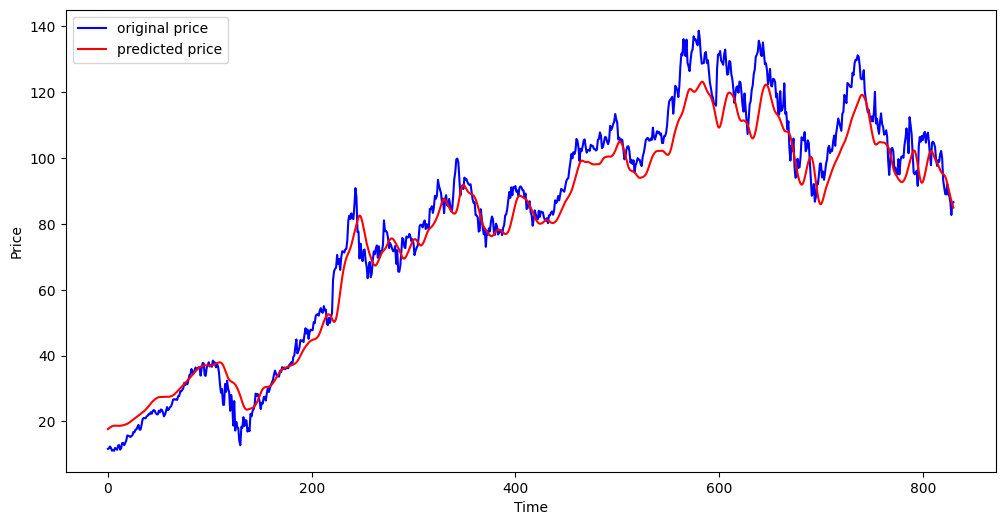

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



In [42]:
print("done completely ")

done completely 
